<a href="https://colab.research.google.com/github/PRIYANKA-1907/VOIS_AICTE_Oct2025_PRIYANKA_B/blob/main/Priyanka_B_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Netflix Dataset (3).csv.xlsx to Netflix Dataset (3).csv.xlsx


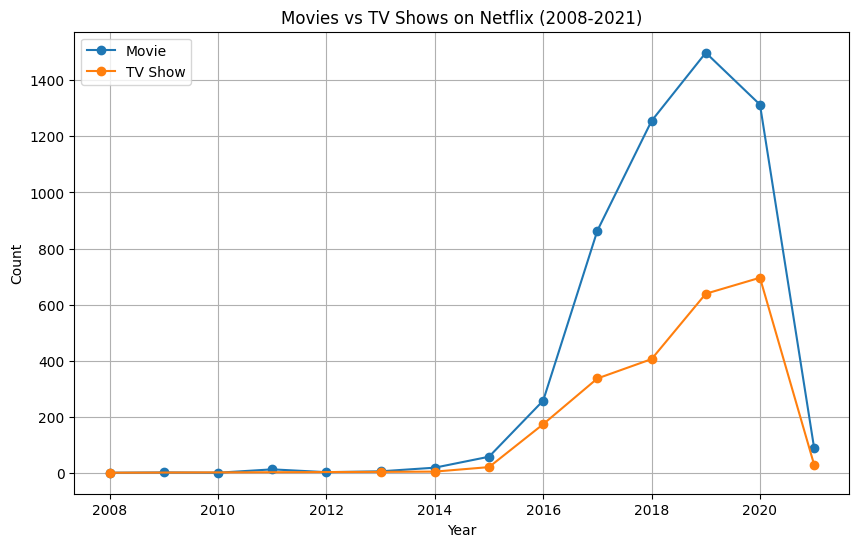

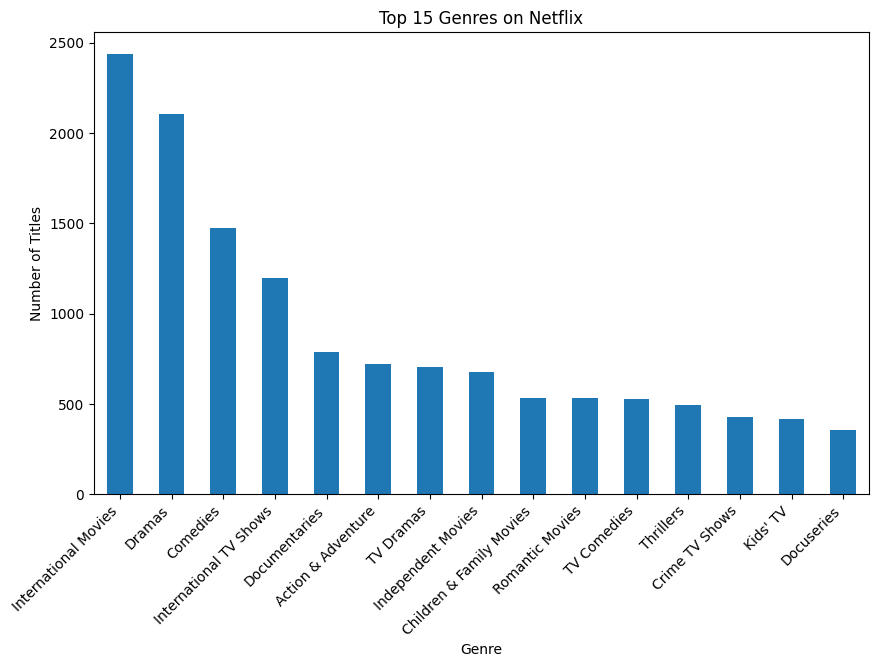

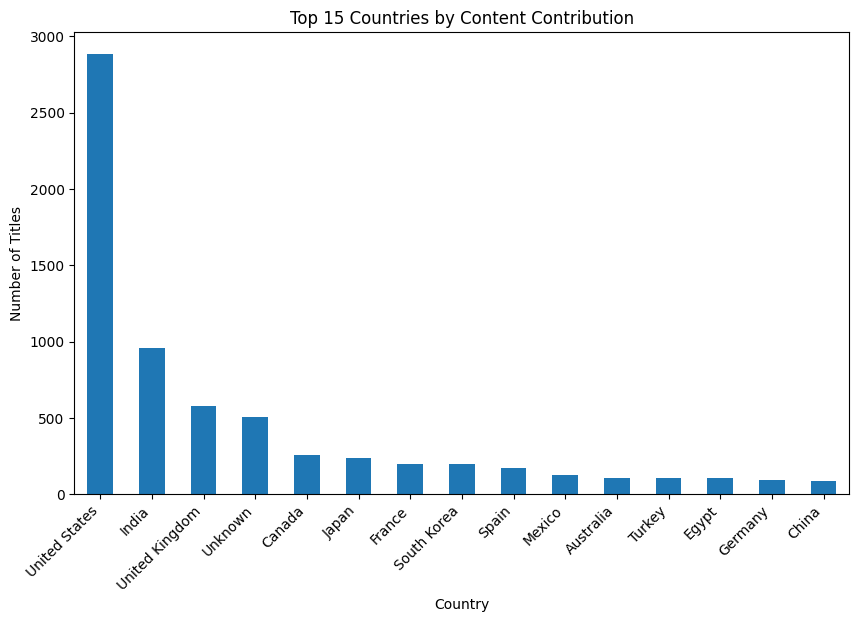

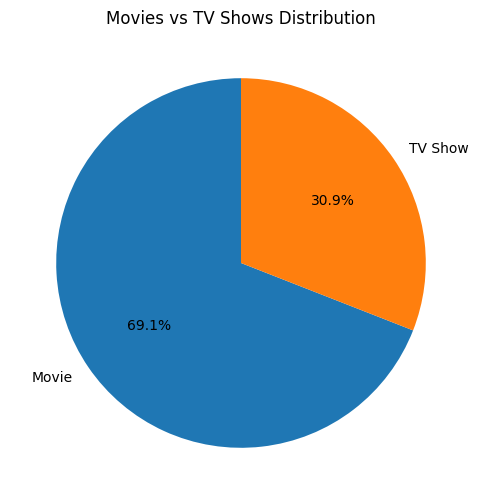


===== Key Insights =====
1. Yearly trends show how Netflix balanced Movies vs TV Shows.
2. Genre analysis highlights the most common categories.
3. Country contribution reveals strong dominance by US, but global growth too.
4. Ratio analysis shows overall balance between Movies and TV Shows.

===== Strategic Recommendations =====
- Increase focus on TV Shows, as competitors are expanding episodic content.
- Dramas remain highly popular; continue producing/driving original drama series.
- Leverage international TV Shows further to strengthen global penetration.
- Content is heavily US-centric. Increase investments in regional markets (India, Korea, etc.).


In [2]:
# =====================
# 1. Upload File in Colab
# =====================
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload the file manually when prompted
uploaded = files.upload()

# Make sure filename matches your uploaded file
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)

# =====================
# 2. Preprocessing
# =====================
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

# =====================
# 3. Movies vs TV Shows Trends
# =====================
category_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(10,6))
for cat in category_trend['Category'].unique():
    subset = category_trend[category_trend['Category'] == cat]
    plt.plot(subset['Year'], subset['Count'], marker='o', label=cat)

plt.title('Movies vs TV Shows on Netflix (2008-2021)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

# =====================
# 4. Genre Analysis
# =====================
genres = df['Type'].dropna().str.split(', ')
genres_exploded = genres.explode().value_counts().head(15)

plt.figure(figsize=(10,6))
genres_exploded.plot(kind='bar')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

# =====================
# 5. Country Contributions
# =====================
df['Main_Country'] = df['Country'].fillna('Unknown').str.split(',').str[0]
country_count = df['Main_Country'].value_counts().head(15)

plt.figure(figsize=(10,6))
country_count.plot(kind='bar')
plt.title('Top 15 Countries by Content Contribution')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.show()

# =====================
# 6. Movies vs TV Shows Ratio
# =====================
category_ratio = df['Category'].value_counts()

plt.figure(figsize=(6,6))
category_ratio.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Movies vs TV Shows Distribution')
plt.ylabel('')
plt.show()

# =====================
# 7. Strategic Recommendations
# =====================
recommendations = []

if category_ratio.get('Movie',0) > category_ratio.get('TV Show',0):
    recommendations.append("Increase focus on TV Shows, as competitors are expanding episodic content.")
else:
    recommendations.append("Maintain strong TV Show library, but consider balancing with exclusive Movies.")

if 'Dramas' in genres_exploded.index[:5].to_list():
    recommendations.append("Dramas remain highly popular; continue producing/driving original drama series.")

if 'International TV Shows' in genres_exploded.index[:10].to_list():
    recommendations.append("Leverage international TV Shows further to strengthen global penetration.")

if 'United States' in country_count.index and country_count['United States'] > 2000:
    recommendations.append("Content is heavily US-centric. Increase investments in regional markets (India, Korea, etc.).")

# =====================
# 8. Summary & Recommendations
# =====================
print("\n===== Key Insights =====")
print("1. Yearly trends show how Netflix balanced Movies vs TV Shows.")
print("2. Genre analysis highlights the most common categories.")
print("3. Country contribution reveals strong dominance by US, but global growth too.")
print("4. Ratio analysis shows overall balance between Movies and TV Shows.")

print("\n===== Strategic Recommendations =====")
for rec in recommendations:
    print("-", rec)
